# Lesson 6 : EPICS area detector

Start the instrument package as our routine initialization.

In [1]:
from instrument.collection import *

I Fri-08:49:15 - ############################################################ startup
I Fri-08:49:15 - logging started
I Fri-08:49:15 - logging level = 10
I Fri-08:49:15 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/collection.py
I Fri-08:49:15 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/mpl/notebook.py


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/mintadmin/Documents/projects/use_bluesky/lessons/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Fri-08:49:16 - bluesky framework
I Fri-08:49:16 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/check_python.py
I Fri-08:49:16 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/check_bluesky.py
I Fri-08:49:18 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/initialize.py
I Fri-08:49:20 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/metadata.py
I Fri-08:49:20 - /home/mintadmin/Documents/projects/use_bluesky/lessons/instrument/framework/callbacks.py
I Fri-08:49:20 - writing to SPEC file: /home/mintadmin/Documents/projects/use_bluesky/lessons/20200508-084920.dat
I Fri-08:49:20 -    >>>>   Using default SPEC file name   <<<<
I Fri-08:49:20 -    file will be created when bluesky ends its next scan
I Fri-08:49:20 -    to change SPEC file, use command:   newSpecFile('title')


The EPICS area detector support in ophyd has many features, some of them specific to the detector make and model.  Let's start with just a few features using the ADSimDetector.  We'll need to import support from ophyd by parts as they are needed.

As we add features from the area detector plugins or other capabilities, the configuration complexity will increase.  So, it is good to start with a simple case where we can control the camera and generate images.

In [2]:
from ophyd import Component
from ophyd.areadetector import ImagePlugin
from ophyd.areadetector import SimDetector
from ophyd.areadetector import SingleTrigger

In [3]:
_ad_prefix = "adsky:"

In [4]:
class MySingleTriggerSimDetector(SingleTrigger, SimDetector): 
       
    image = Component(ImagePlugin, suffix="image1:")

In [7]:
adsimdet = MySingleTriggerSimDetector(_ad_prefix, name='adsimdet')

In [8]:
adsimdet.stage_sigs["cam.num_images"] = 1
adsimdet.stage_sigs["cam.acquire_time"] = 0.1
adsimdet.stage_sigs["cam.acquire_period"] = 0.25

adsimdet.stage_sigs

OrderedDict([('cam.acquire', 0),
             ('cam.image_mode', 1),
             ('cam.num_images', 1),
             ('cam.acquire_time', 0.1),
             ('cam.acquire_period', 0.25)])

In [9]:
RE(bp.count([adsimdet]))



Transient Scan ID: 1     Time: 2020-05-08 08:59:04
Persistent Unique Scan ID: '4da22291-defa-4c76-9558-10bd431e74c7'
New stream: 'primary'
+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 08:59:04.2 |
+-----------+------------+
generator count ['4da22291'] (scan num: 1)


('4da22291-defa-4c76-9558-10bd431e74c7',)

Get the detector image and display it.

In [17]:
shape = adsimdet.image.array_size.get()
im = adsimdet.image.array_data.get().reshape((shape.height, shape.width))

In [20]:
from instrument.mpl import plt

<IPython.core.display.Javascript object>


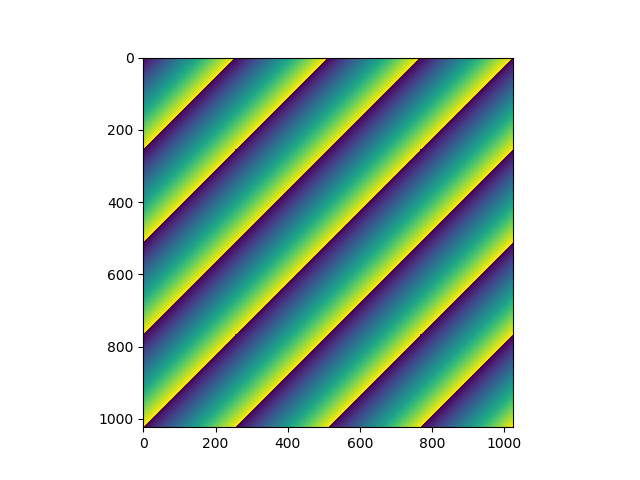

In [21]:
plt.imshow(im)

TODO: Save image(s) to HDF5 file.